In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io
import os
import numpy as np

def checkEquality(data, filtered_rows):

    # Define the directory and filenames
    directory = '/content/drive/MyDrive/Colab Notebooks/Final/Data'  # Update this to your actual directory
    filenames = [
        'Data_AGRK1_31_Jan_2024_13_6.mat', 'Data_AGRK2_31_Jan_2024_13_30.mat', 'Data_AGRK3_31_Jan_2024_13_49.mat',
        'Data_AGRK4_31_Jan_2024_14_12.mat', 'Data_AliK1_16_Jun_2024_10_4.mat', 'Data_AliK2_16_Jun_2024_10_26.mat',
        'Data_AliK3_16_Jun_2024_10_48.mat', 'Data_AliK4_16_Jun_2024_11_9.mat', 'Data_Amin1_05_Sep_2023_15_3.mat',
        'Data_Amin2_05_Sep_2023_15_38.mat', 'Data_Amin3_05_Sep_2023_16_13.mat', 'Data_Amin4_05_Sep_2023_15_56.mat',
        'Data_Amiri1_31_Dec_2023_15_7.mat', 'Data_Amiri2_31_Dec_2023_15_47.mat', 'Data_Amiri3_31_Dec_2023_16_38.mat',
        'Data_Amiri4_31_Dec_2023_17_5.mat', 'Data_Fara1_27_May_2024_13_47.mat', 'Data_Fara2_27_May_2024_14_13.mat',
        'Data_Fara3_27_May_2024_14_35.mat', 'Data_Fara4_27_May_2024_15_0.mat', 'Data_HDNY1_06_May_2024_17_44.mat',
        'Data_HDNY2_06_May_2024_18_14.mat', 'Data_HDNY3_06_May_2024_18_38.mat', 'Data_HDNY4_06_May_2024_19_2.mat',
        'Data_Kiani_03_Jan_2024_17_11.mat', 'Data_Kiani2_03_Jan_2024_17_36.mat', 'Data_Kiani3_03_Jan_2024_18_3.mat',
        'Data_Kiani4_03_Jan_2024_18_22.mat', 'Data_Navid1_25_Dec_2023_12_19.mat', 'Data_Navid2_25_Dec_2023_12_43.mat',
        'Data_Navid3_25_Dec_2023_13_9.mat', 'Data_Navid4_25_Dec_2023_13_36.mat', 'Data_NVRDY1_07_Feb_2024_15_37.mat',
        'Data_NVRDY2_07_Feb_2024_16_7.mat', 'Data_NVRDY3_07_Feb_2024_16_32.mat', 'Data_NVRDY4_07_Feb_2024_16_55.mat',
        'Data_Parsa1_27_Dec_2023_11_10.mat', 'Data_Parsa2_27_Dec_2023_12_2.mat', 'Data_Parsa3_27_Dec_2023_12_43.mat',
        'Data_PRY1_12_Jun_2024_16_55.mat', 'Data_PRY2_12_Jun_2024_17_19.mat', 'Data_PRY3_12_Jun_2024_17_43.mat',
        'Data_PRY4_12_Jun_2024_18_5.mat', 'Data_PYMN1_19_Jun_2024_16_47.mat', 'Data_PYMN2_19_Jun_2024_17_12.mat',
        'Data_ZHDY1_04_Feb_2024_15_3.mat', 'Data_ZHDY2_04_Feb_2024_15_22.mat', 'Data_ZHDY3_04_Feb_2024_15_50.mat',
        'Data_ZHDY4_04_Feb_2024_16_14.mat'
    ]

    # Initialize a dictionary to hold the variable names and their fields
    variable_fields = {}

    # Load the .mat files, extract variable names and their fields
    for filename in filenames:
        filepath = os.path.join(directory, filename)
        mat_data = scipy.io.loadmat(filepath)

        # Filter out default keys added by scipy.io.loadmat
        data_vars = [var for var in mat_data.keys() if not var.startswith('__')]

        if data_vars:
            only_var = data_vars[0]
            if mat_data[only_var].dtype.names:
                variable_fields[filename] = {field: mat_data[only_var][field][0][0] for field in mat_data[only_var].dtype.names if field in ['labels', 'Accuracy']}

    temp1 = 2*np.ones((10,))
    array_of_ones = np.ones((1, 10))
    # Print the fields 'labels' and 'Accuracy' for each file
    for filename, fields in variable_fields.items():
        #print(f"File: {filename}")
        for field, value in fields.items():
            if field == 'labels':
                are_equal = np.allclose(value[:10], data[:10], atol=1e-07)
                if are_equal:
                  temp1 = value[np.array(filtered_rows)-1, 0]
            if field == 'Accuracy' and are_equal:
                acc = value
                #print(f"Accuracy: {acc[0][np.array(filtered_rows)-1]}")
                temp = acc[0][np.array(filtered_rows)-1]
                # Update array_of_ones based on temp
                for idx, val in enumerate(temp):
                    if val == 0:
                        array_of_ones[0][idx] = 0
    #print(array_of_ones[0])
    print(temp1.shape)
    return array_of_ones[0], temp1


In [3]:
import numpy as np
import os
import shutil

destination_base_path = '/content/Filtered_Images'

# Check if the destination folder exists, delete it if it does
if os.path.exists(destination_base_path):
    shutil.rmtree(destination_base_path)
    print(f"Deleted existing directory: {destination_base_path}")

# Create the destination folder if it doesn't exist
os.makedirs(destination_base_path, exist_ok=True)

# Counter for renaming images
image_counter = 1

# Base path for the task directory
task_base_path = '/content/drive/MyDrive/Colab Notebooks/Final/Blocks/Task'

# Initialize arrays to accumulate all filtered rows and positions data
all_filtered_rows = []
all_positions_data = []
all_arrays_of_ones = []
all_arrays_of_types = []

counter = 0
# Iterate through Sub1 to Sub8
for sub_folder in range(1, 9):
    sub_folder_path = os.path.join(task_base_path, f'Sub{sub_folder}')

    # Iterate through folders 1 to 4 within each subfolder
    for i in range(1, 5):
        counter += 1
        print(f"File number {counter} Processed")
        file_path = os.path.join(sub_folder_path, f'{i}', f'Labels{i}.txt')
        positions_file_path = os.path.join(sub_folder_path, f'{i}', f'Positions{i}.txt')
        source_base_path = os.path.join(sub_folder_path, f'{i}', 'Images')

        # Read the Labels file and process the data
        data = []
        with open(file_path, 'r') as file:
            for line in file:
                # Clean the line and convert to list of integers
                cleaned_line = line.strip()[1:-1].split(',')
                row = [int(x) for x in cleaned_line]
                data.append(row)

        # Convert list of lists to a numpy array
        data = np.array(data)

        # Filter rows where the 5th element is 1 and the 3rd element is 1
        filtered_rows = [j + 1 for j, row in enumerate(data) if row[4] == 1 and row[2] == 1]
        array_of_ones, arrays_of_types = checkEquality(data, filtered_rows)
        # Extend the all_filtered_rows array with the filtered rows from this iteration
        all_filtered_rows.extend(filtered_rows)
        all_arrays_of_ones.extend(array_of_ones)
        all_arrays_of_types.extend(arrays_of_types)
        # Print the indices of the filtered rows
        #print(f"Indices of rows where the 5th element is 1 and the 3rd element is 1 in Labels{i}.txt:")
        #print(filtered_rows)

        # Extract the third element of each row
        third_elements = data[:, 2]

        # Sort the array of third elements
        #sorted_third_elements = np.sort(third_elements)

        # Print the sorted array of third elements
        #print(f"Sorted array of the third elements from each row in Labels{i}.txt:")
        #print(sorted_third_elements)

        # Read the Positions file and process the data
        positions_data = []
        with open(positions_file_path, 'r') as file:
            for line in file:
                # Clean the line and convert to list of lists of integers
                line = line.strip()[2:-2]  # Remove the surrounding brackets
                cleaned_line = line.split('], [')
                positions = [[int(y) for y in x.split(',')] for x in cleaned_line]
                positions_data.append(positions)

        # Extend the all_positions_data array with the positions data from this iteration
        all_positions_data.extend(positions_data)

        # Print the filtered lines from the Positions file
        #print(f"Filtered lines from Positions{i}.txt:")
        #for idx in filtered_rows:
            #print(positions_data[idx - 1])

        # Copy images from the folders corresponding to filtered_rows
        for idx in filtered_rows:
            source_folder = os.path.join(source_base_path, str(idx))

            # Check if the source folder exists
            if os.path.exists(source_folder):
                # Copy all files from source_folder to destination_base_path
                for file_name in os.listdir(source_folder):
                    source_file = os.path.join(source_folder, file_name)
                    # Create a new name for the destination file
                    new_file_name = f'image_{image_counter}.jpg'  # Change extension as needed
                    destination_file = os.path.join(destination_base_path, new_file_name)
                    if os.path.isfile(source_file):  # Ensure it's a file before copying
                        shutil.copy(source_file, destination_file)
                        #print(f"Copied {source_file} to {destination_file}")
                        image_counter += 1

print("All specified images have been copied and renamed.")

# Print the accumulated filtered rows and positions data
print("Accumulated filtered rows across all iterations:")
print(all_filtered_rows)
print("Accumulated positions data across all iterations:")
print(all_positions_data)
print("Accumulated Accuracy across all iterations:")
print(all_arrays_of_ones)


File number 1 Processed
(10,)
File number 2 Processed
(10,)
File number 3 Processed
(10,)
File number 4 Processed
(10,)
File number 5 Processed
(10,)
File number 6 Processed
(10,)
File number 7 Processed
(10,)
File number 8 Processed
(10,)
File number 9 Processed
(10,)
File number 10 Processed
(10,)
File number 11 Processed
(10,)
File number 12 Processed
(10,)
File number 13 Processed
(10,)
File number 14 Processed
(10,)
File number 15 Processed
(10,)
File number 16 Processed
(10,)
File number 17 Processed
(10,)
File number 18 Processed
(10,)
File number 19 Processed
(10,)
File number 20 Processed
(10,)
File number 21 Processed
(10,)
File number 22 Processed
(10,)
File number 23 Processed
(10,)
File number 24 Processed
(10,)
File number 25 Processed
(10,)
File number 26 Processed
(10,)
File number 27 Processed
(10,)
File number 28 Processed
(10,)
File number 29 Processed
(10,)
File number 30 Processed
(10,)
File number 31 Processed
(10,)
File number 32 Processed
(10,)
All specified ima

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
from scipy.stats import entropy

# Function to calculate the entropy of an image
def calculate_entropy(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0, 256), density=True)
    return entropy(histogram)

# Set the directory path
destination_base_path = '/content/Filtered_Images'

# List all files in the directory
image_files = [file for file in os.listdir(destination_base_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]
# Sort files numerically by extracting the number part and converting it to an integer
image_files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
print(image_files)
# Calculate the entropy for each image and store in a list
images_with_entropy = []
for image_file in image_files:
    img_path = os.path.join(destination_base_path, image_file)
    img = Image.open(img_path).convert('L')  # Convert image to grayscale
    img_array = np.array(img)
    img_entropy = calculate_entropy(img_array)
    images_with_entropy.append((image_file, img_entropy))

'''
# Sort images by entropy
images_with_entropy.sort(key=lambda x: x[1])

# Determine grid size
rows = 32
cols = 10
fig, axs = plt.subplots(rows, cols, figsize=(20, 64))

# Plot the images in a 2 by 10 grid
for i, (image_file, img_entropy) in enumerate(images_with_entropy):
    row = i // cols
    col = i % cols
    if row < rows:
        img_path = os.path.join(destination_base_path, image_file)
        img = mpimg.imread(img_path)

        axs[row, col].imshow(img)
        axs[row, col].set_title(f"{image_file}\nEntropy: {img_entropy:.4f}")
        axs[row, col].axis('off')

# Hide any remaining empty subplots
for j in range(len(images_with_entropy), rows * cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()
'''


['image_1.jpg', 'image_2.jpg', 'image_3.jpg', 'image_4.jpg', 'image_5.jpg', 'image_6.jpg', 'image_7.jpg', 'image_8.jpg', 'image_9.jpg', 'image_10.jpg', 'image_11.jpg', 'image_12.jpg', 'image_13.jpg', 'image_14.jpg', 'image_15.jpg', 'image_16.jpg', 'image_17.jpg', 'image_18.jpg', 'image_19.jpg', 'image_20.jpg', 'image_21.jpg', 'image_22.jpg', 'image_23.jpg', 'image_24.jpg', 'image_25.jpg', 'image_26.jpg', 'image_27.jpg', 'image_28.jpg', 'image_29.jpg', 'image_30.jpg', 'image_31.jpg', 'image_32.jpg', 'image_33.jpg', 'image_34.jpg', 'image_35.jpg', 'image_36.jpg', 'image_37.jpg', 'image_38.jpg', 'image_39.jpg', 'image_40.jpg', 'image_41.jpg', 'image_42.jpg', 'image_43.jpg', 'image_44.jpg', 'image_45.jpg', 'image_46.jpg', 'image_47.jpg', 'image_48.jpg', 'image_49.jpg', 'image_50.jpg', 'image_51.jpg', 'image_52.jpg', 'image_53.jpg', 'image_54.jpg', 'image_55.jpg', 'image_56.jpg', 'image_57.jpg', 'image_58.jpg', 'image_59.jpg', 'image_60.jpg', 'image_61.jpg', 'image_62.jpg', 'image_63.jpg', 

'\n# Sort images by entropy\nimages_with_entropy.sort(key=lambda x: x[1])\n\n# Determine grid size\nrows = 32\ncols = 10\nfig, axs = plt.subplots(rows, cols, figsize=(20, 64))\n\n# Plot the images in a 2 by 10 grid\nfor i, (image_file, img_entropy) in enumerate(images_with_entropy):\n    row = i // cols\n    col = i % cols\n    if row < rows:\n        img_path = os.path.join(destination_base_path, image_file)\n        img = mpimg.imread(img_path)\n\n        axs[row, col].imshow(img)\n        axs[row, col].set_title(f"{image_file}\nEntropy: {img_entropy:.4f}")\n        axs[row, col].axis(\'off\')\n\n# Hide any remaining empty subplots\nfor j in range(len(images_with_entropy), rows * cols):\n    fig.delaxes(axs.flatten()[j])\n\nplt.tight_layout()\nplt.show()\n'

In [5]:
print(all_filtered_rows)

# Iterate through the list in chunks of 10
for i in range(0, len(all_filtered_rows), 10):
    # Determine the value to add based on the chunk index
    value_to_add = (i // 10) * 120
    # Add the value to each element in the current chunk
    for j in range(i, i + 10):
        all_filtered_rows[j] += value_to_add

# Print the updated list
print(all_filtered_rows)


[6, 7, 9, 13, 18, 25, 58, 91, 99, 109, 12, 38, 41, 43, 53, 63, 80, 89, 107, 112, 9, 38, 52, 56, 65, 73, 93, 107, 111, 117, 4, 12, 15, 21, 29, 30, 31, 33, 72, 114, 2, 4, 31, 40, 53, 67, 73, 93, 95, 116, 1, 25, 41, 42, 49, 56, 67, 80, 90, 109, 5, 9, 54, 65, 66, 67, 78, 83, 114, 115, 12, 18, 22, 41, 54, 69, 73, 75, 76, 107, 23, 33, 38, 39, 44, 47, 50, 67, 86, 105, 4, 17, 19, 46, 47, 52, 53, 61, 109, 119, 2, 4, 23, 44, 56, 65, 67, 86, 112, 115, 2, 16, 33, 36, 57, 80, 86, 92, 108, 114, 1, 3, 17, 43, 46, 63, 80, 105, 109, 118, 7, 13, 19, 32, 44, 67, 77, 85, 87, 118, 1, 14, 40, 41, 42, 60, 76, 82, 86, 112, 12, 22, 25, 44, 48, 50, 61, 66, 75, 89, 2, 10, 29, 47, 50, 56, 84, 86, 113, 120, 5, 12, 25, 28, 31, 39, 42, 90, 102, 106, 23, 30, 57, 65, 68, 75, 90, 95, 107, 120, 18, 30, 33, 41, 48, 62, 66, 95, 100, 115, 3, 16, 19, 35, 43, 65, 89, 96, 97, 101, 1, 8, 14, 34, 60, 64, 86, 104, 108, 117, 4, 8, 9, 21, 23, 34, 47, 75, 112, 114, 11, 21, 23, 27, 40, 62, 94, 99, 105, 111, 14, 26, 37, 52, 54, 62, 7

In [6]:
print(all_arrays_of_types)

[1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,

In [7]:
import os
import numpy as np
from PIL import Image

# Set the directory path for the new cropped images
cropped_images_dir = '/content/Cropped_Images'

# Check if the destination folder exists, delete it if it does
if os.path.exists(cropped_images_dir):
    shutil.rmtree(cropped_images_dir)
    print(f"Deleted existing directory: {cropped_images_dir}")

os.makedirs(cropped_images_dir, exist_ok=True)

# Define the crop sizes based on entropy ranges
def get_crop_size(entropy):
    if entropy < 0.0901:
        return 100
    elif entropy < 0.1210:
        return 114
    elif entropy < 0.1710:
        return 133
    elif entropy < 0.2450:
        return 160
    else:
        return 200

counter = 0
# Crop and save the images
for TypeChecker, AccChecker, idx, (image_file, img_entropy) in zip(all_arrays_of_types, all_arrays_of_ones, all_filtered_rows, images_with_entropy):
    if AccChecker < 0.5:
        continue
    if TypeChecker > 0.5:
        continue
    counter += 1
    img_path = os.path.join(destination_base_path, image_file)
    img = Image.open(img_path)
    crop_size = get_crop_size(img_entropy)
    print(img_path)
    for position in all_positions_data[idx-1]:
        #print("****************************")
        #print(crop_size)
        #print(position)
        y, x = position
        left = max(x , 0)
        upper = max(y , 0)
        right = min(x + crop_size , img.width)
        lower = min(y + crop_size , img.height)
        cropped_img = img.crop((left, upper, right, lower))

        # Create a unique name for the cropped image
        cropped_img_name = f"{os.path.splitext(image_file)[0]}.png"
        cropped_img_path = os.path.join(cropped_images_dir, cropped_img_name)
        # Save the cropped image
        print(cropped_img_name)
        cropped_img.save(cropped_img_path)

print(f"Cropped images have been saved in the directory: {cropped_images_dir}")


/content/Filtered_Images/image_4.jpg
image_4.png
/content/Filtered_Images/image_6.jpg
image_6.png
/content/Filtered_Images/image_9.jpg
image_9.png
/content/Filtered_Images/image_16.jpg
image_16.png
/content/Filtered_Images/image_17.jpg
image_17.png
/content/Filtered_Images/image_20.jpg
image_20.png
/content/Filtered_Images/image_23.jpg
image_23.png
/content/Filtered_Images/image_28.jpg
image_28.png
/content/Filtered_Images/image_41.jpg
image_41.png
/content/Filtered_Images/image_42.jpg
image_42.png
/content/Filtered_Images/image_47.jpg
image_47.png
/content/Filtered_Images/image_49.jpg
image_49.png
/content/Filtered_Images/image_54.jpg
image_54.png
/content/Filtered_Images/image_55.jpg
image_55.png
/content/Filtered_Images/image_59.jpg
image_59.png
/content/Filtered_Images/image_63.jpg
image_63.png
/content/Filtered_Images/image_64.jpg
image_64.png
/content/Filtered_Images/image_65.jpg
image_65.png
/content/Filtered_Images/image_69.jpg
image_69.png
/content/Filtered_Images/image_72.jpg

In [20]:
import os
import shutil
from PIL import Image

# Define source and target directories
source_dir = '/content/Cropped_Images'
target_dir = '/content/Organized_Images'

# Define target subdirectories based on image sizes
size_dirs = [100, 114, 133, 160, 200]

# Create target directories if they don't exist
os.makedirs(target_dir, exist_ok=True)
for size in size_dirs:
    os.makedirs(os.path.join(target_dir, str(size)), exist_ok=True)

# Function to get image size
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# Process each image in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Add other image extensions if needed
        image_path = os.path.join(source_dir, filename)
        image_size = get_image_size(image_path)

        if image_size[0] == image_size[1]:  # Ensure the image is square
            size = image_size[0]
            if size in size_dirs:
                shutil.copy(image_path, os.path.join(target_dir, str(size), filename))

print("Images have been organized successfully.")


Images have been organized successfully.


5.1650486430257265
5.042264749275248
5.569855073731006
5.502124926014666
5.132880408343163
5.529138498929961
4.9717311971033755
5.478250945523729
4.931325790710215
4.79270911726534
4.926240328208877
5.255896342992683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


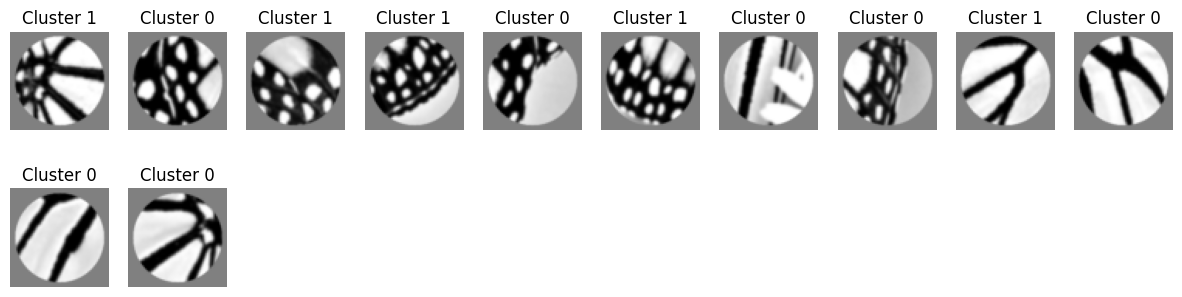

In [53]:
# Import required libraries
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os
from PIL import Image
from typing import List, Any as Tensor
from google.colab import drive
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


# Define the Conditional VAE class
class ConditionalVAE(nn.Module):
    def __init__(self, in_channels, num_classes, latent_dim, hidden_dims=None, img_size=64, **kwargs):
        super(ConditionalVAE, self).__init__()
        self.latent_dim = latent_dim
        self.img_size = img_size
        self.embed_class = nn.Linear(num_classes, img_size * img_size)
        self.embed_data = nn.Conv2d(in_channels, in_channels, kernel_size=1)

        modules = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 256, 512]

        in_channels += 1  # To account for the extra label channel

        # Build Encoder
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, h_dim, kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(hidden_dims[-1]*4, latent_dim)
        self.fc_var = nn.Linear(hidden_dims[-1]*4, latent_dim)

        # Build Decoder
        modules = []
        self.decoder_input = nn.Linear(latent_dim + num_classes, hidden_dims[-1] * 4)
        hidden_dims.reverse()

        for i in range(len(hidden_dims) - 1):
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(hidden_dims[i], hidden_dims[i + 1], kernel_size=3, stride=2, padding=1, output_padding=1),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU())
            )

        self.decoder = nn.Sequential(*modules)
        self.final_layer = nn.Sequential(
                            nn.ConvTranspose2d(hidden_dims[-1], hidden_dims[-1], kernel_size=3, stride=2, padding=1, output_padding=1),
                            nn.BatchNorm2d(hidden_dims[-1]),
                            nn.LeakyReLU(),
                            nn.Conv2d(hidden_dims[-1], out_channels=3, kernel_size=3, padding=1),
                            nn.Tanh())

    def encode(self, input):
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)
        return [mu, log_var]

    def decode(self, z):
        result = self.decoder_input(z)
        result = result.view(-1, 512, 2, 2)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def forward(self, input, labels):
        y = labels.float()
        embedded_class = self.embed_class(y)
        embedded_class = embedded_class.view(-1, 1, self.img_size, self.img_size)
        embedded_input = self.embed_data(input)
        x = torch.cat([embedded_input, embedded_class], dim=1)
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        z = torch.cat([z, y], dim=1)
        return [self.decode(z), input, mu, log_var]

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

from PIL import Image
import os
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader

# Function to calculate entropy of an image
def calculate_entropy(image):
    grayscale_image = image.convert('L')  # Convert image to grayscale for entropy calculation
    histogram = grayscale_image.histogram()
    histogram_length = sum(histogram)
    samples_probability = [float(h) / histogram_length for h in histogram]
    return -sum(p * np.log2(p) for p in samples_probability if p != 0)

# Custom dataset class with image loading and entropy filtering
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None, entropy_threshold=4):
        self.folder_path = folder_path
        self.transform = transform
        self.images = []
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB
                entropy = calculate_entropy(image)
                print(entropy)
                if entropy >= entropy_threshold:
                    self.images.append((image, img_path))
                else:
                    os.remove(img_path)  # Remove images with low entropy

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image, _ = self.images[index]
        if self.transform:
            image = self.transform(image)
        return image

# Image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset and create DataLoader
dataset_path = '/content/Organized_Images/200'
dataset = ImageDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)


# Initialize the VAE model
model = ConditionalVAE(in_channels=3, num_classes=10, latent_dim=20, img_size=64)
model.eval()  # Set the model to evaluation mode if it's pre-trained

# Extract latent vectors
latent_vectors = []
with torch.no_grad():
    for images in dataloader:
        labels = torch.zeros(images.shape[0], 10)  # Dummy labels
        _, _, mu, _ = model(images, labels)
        latent_vectors.append(mu)
latent_vectors = torch.cat(latent_vectors)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(latent_vectors.cpu().numpy())

# Plot images with cluster labels
def plot_images_with_clusters():
    plt.figure(figsize=(15, 20))
    for i, (images, label) in enumerate(zip(dataloader.dataset, cluster_labels)):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
        plt.title(f'Cluster {label}')
        plt.axis('off')
        if i == 99:  # Limit to 100 images
            break
    plt.show()

plot_images_with_clusters()


5.1650486430257265
5.042264749275248
5.569855073731006
5.502124926014666
5.132880408343163
5.529138498929961
4.9717311971033755
5.478250945523729
4.931325790710215
4.79270911726534
4.926240328208877
5.255896342992683


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


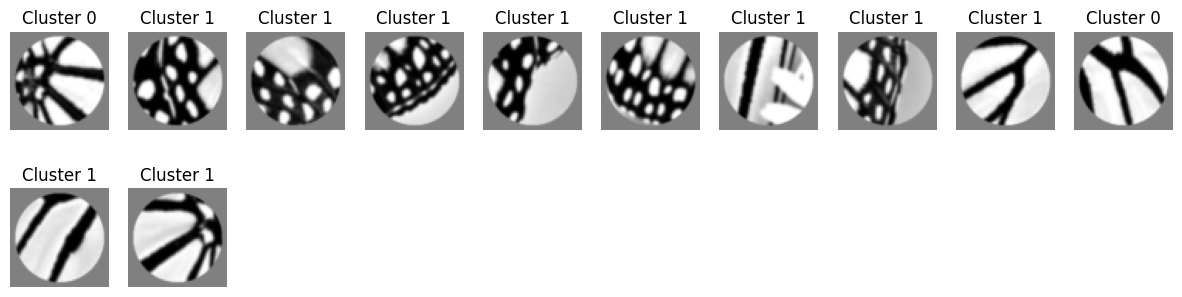

In [57]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os
from PIL import Image
from typing import List, Any as Tensor
from google.colab import drive
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Define the WAE_MMD class
class WAE_MMD(nn.Module):
    def __init__(self, in_channels: int, latent_dim: int, hidden_dims: List = None, reg_weight: int = 100, kernel_type: str = 'imq', latent_var: float = 2., **kwargs):
        super(WAE_MMD, self).__init__()
        self.latent_dim = latent_dim
        self.reg_weight = reg_weight
        self.kernel_type = kernel_type
        self.z_var = latent_var

        modules = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 256, 512]

        # Build Encoder
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, h_dim, kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim
        self.encoder = nn.Sequential(*modules)
        self.fc_z = nn.Linear(hidden_dims[-1] * 4, latent_dim)

        # Build Decoder
        modules = []
        self.decoder_input = nn.Linear(latent_dim, hidden_dims[-1] * 4)
        hidden_dims.reverse()
        for i in range(len(hidden_dims) - 1):
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(hidden_dims[i], hidden_dims[i + 1], kernel_size=3, stride=2, padding=1, output_padding=1),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU())
            )
        self.decoder = nn.Sequential(*modules)
        self.final_layer = nn.Sequential(
                            nn.ConvTranspose2d(hidden_dims[-1], hidden_dims[-1], kernel_size=3, stride=2, padding=1, output_padding=1),
                            nn.BatchNorm2d(hidden_dims[-1]),
                            nn.LeakyReLU(),
                            nn.Conv2d(hidden_dims[-1], out_channels=3, kernel_size=3, padding=1),
                            nn.Tanh())

    def forward(self, input: Tensor, **kwargs):
        z = self.encode(input)
        return [self.decode(z), input, z]

    def encode(self, input: Tensor) -> Tensor:
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)
        z = self.fc_z(result)
        return z

    def decode(self, z: Tensor) -> Tensor:
        result = self.decoder_input(z)
        result = result.view(-1, 512, 2, 2)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

from PIL import Image
import os
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader

# Function to calculate entropy of an image
def calculate_entropy(image):
    grayscale_image = image.convert('L')  # Convert image to grayscale for entropy calculation
    histogram = grayscale_image.histogram()
    histogram_length = sum(histogram)
    samples_probability = [float(h) / histogram_length for h in histogram]
    return -sum(p * np.log2(p) for p in samples_probability if p != 0)

# Custom dataset class with image loading and entropy filtering
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None, entropy_threshold=4):
        self.folder_path = folder_path
        self.transform = transform
        self.images = []
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                image = Image.open(img_path).convert('RGB')  # Ensure image is in RGB
                entropy = calculate_entropy(image)
                print(entropy)
                if entropy >= entropy_threshold:
                    self.images.append((image, img_path))
                else:
                    os.remove(img_path)  # Remove images with low entropy

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image, _ = self.images[index]
        if self.transform:
            image = self.transform(image)
        return image

# Image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset and create DataLoader
dataset_path = '/content/Organized_Images/200'
dataset = ImageDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)



# Initialize the WAE_MMD model
model = WAE_MMD(in_channels=3, latent_dim=20, img_size=64)
model.eval()  # Set the model to evaluation mode if it's pre-trained

# Extract latent vectors
latent_vectors = []
with torch.no_grad():
    for images in dataloader:
        _, _, z = model(images)
        latent_vectors.append(z)
latent_vectors = torch.cat(latent_vectors)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(latent_vectors.cpu().numpy())

# Plot images with cluster labels
def plot_images_with_clusters():
    plt.figure(figsize=(15, 20))
    for i, (images, label) in enumerate(zip(dataloader.dataset, cluster_labels)):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
        plt.title(f'Cluster {label}')
        plt.axis('off')
        if i == 99:  # Limit to 100 images
            break
    plt.show()

plot_images_with_clusters()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


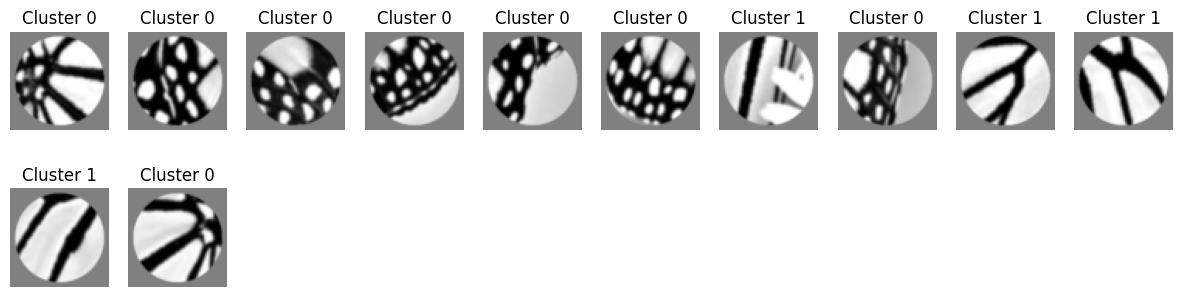

In [59]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os
from PIL import Image
from typing import List, Any as Tensor
from google.colab import drive
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Define the VQVAE class with its dependencies
class ResidualLayer(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super(ResidualLayer, self).__init__()
        self.resblock = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, bias=False)
        )

    def forward(self, input: Tensor) -> Tensor:
        return input + self.resblock(input)

class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings: int, embedding_dim: int, beta: float = 0.25):
        super(VectorQuantizer, self).__init__()
        self.K = num_embeddings
        self.D = embedding_dim
        self.beta = beta
        self.embedding = nn.Embedding(self.K, self.D)
        self.embedding.weight.data.uniform_(-1 / self.K, 1 / self.K)

    def forward(self, latents: Tensor) -> Tensor:
        latents = latents.permute(0, 2, 3, 1).contiguous()
        latents_shape = latents.shape
        flat_latents = latents.view(-1, self.D)
        dist = torch.sum(flat_latents ** 2, dim=1, keepdim=True) + \
               torch.sum(self.embedding.weight ** 2, dim=1) - \
               2 * torch.matmul(flat_latents, self.embedding.weight.t())
        encoding_inds = torch.argmin(dist, dim=1).unsqueeze(1)
        device = latents.device
        encoding_one_hot = torch.zeros(encoding_inds.size(0), self.K, device=device)
        encoding_one_hot.scatter_(1, encoding_inds, 1)
        quantized_latents = torch.matmul(encoding_one_hot, self.embedding.weight)
        quantized_latents = quantized_latents.view(latents_shape)
        commitment_loss = F.mse_loss(quantized_latents.detach(), latents)
        embedding_loss = F.mse_loss(quantized_latents, latents.detach())
        vq_loss = commitment_loss * self.beta + embedding_loss
        quantized_latents = latents + (quantized_latents - latents).detach()
        return quantized_latents.permute(0, 3, 1, 2).contiguous(), vq_loss

class VQVAE(nn.Module):
    def __init__(self, in_channels: int, embedding_dim: int, num_embeddings: int, hidden_dims: List = None, beta: float = 0.25, img_size: int = 64):
        super(VQVAE, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.img_size = img_size
        self.beta = beta

        modules = []
        if hidden_dims is None:
            hidden_dims = [128, 256]

        for h_dim in hidden_dims:
            modules.append(nn.Sequential(nn.Conv2d(in_channels, h_dim, kernel_size=4, stride=2, padding=1), nn.LeakyReLU()))
            in_channels = h_dim

        modules.append(nn.Sequential(nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1), nn.LeakyReLU()))

        for _ in range(6):
            modules.append(ResidualLayer(in_channels, in_channels))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Sequential(nn.Conv2d(in_channels, embedding_dim, kernel_size=1, stride=1), nn.LeakyReLU()))

        self.encoder = nn.Sequential(*modules)
        self.vq_layer = VectorQuantizer(num_embeddings, embedding_dim, beta)
        modules = []

        modules.append(nn.Sequential(nn.Conv2d(embedding_dim, hidden_dims[-1], kernel_size=3, stride=1, padding=1), nn.LeakyReLU()))

        for _ in range(6):
            modules.append(ResidualLayer(hidden_dims[-1], hidden_dims[-1]))

        modules.append(nn.LeakyReLU())
        hidden_dims.reverse()

        for i in range(len(hidden_dims) - 1):
            modules.append(nn.Sequential(nn.ConvTranspose2d(hidden_dims[i], hidden_dims[i + 1], kernel_size=4, stride=2, padding=1), nn.LeakyReLU()))

        modules.append(nn.Sequential(nn.ConvTranspose2d(hidden_dims[-1], out_channels=3, kernel_size=4, stride=2, padding=1), nn.Tanh()))
        self.decoder = nn.Sequential(*modules)

    def encode(self, input: Tensor) -> List[Tensor]:
        result = self.encoder(input)
        return [result]

    def decode(self, z: Tensor) -> Tensor:
        result = self.decoder(z)
        return result

    def forward(self, input: Tensor, **kwargs) -> List[Tensor]:
        encoding = self.encode(input)[0]
        quantized_inputs, vq_loss = self.vq_layer(encoding)
        return [self.decode(quantized_inputs), input, vq_loss]

    def loss_function(self, *args, **kwargs) -> dict:
        recons = args[0]
        input = args[1]
        vq_loss = args[2]
        recons_loss = F.mse_loss(recons, input)
        loss = recons_loss + vq_loss
        return {'loss': loss, 'Reconstruction_Loss': recons_loss, 'VQ_Loss': vq_loss}

from PIL import Image
import os
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define helper functions and classes (such as calculate_entropy and ImageDataset)
def calculate_entropy(image):
    grayscale_image = image.convert('L')
    histogram = grayscale_image.histogram()
    histogram_length = sum(histogram)
    samples_probability = [float(h) / histogram_length for h in histogram]
    return -sum(p * np.log2(p) for p in samples_probability if p != 0)

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None, entropy_threshold=4):
        self.folder_path = folder_path
        self.transform = transform
        self.images = []
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                image = Image.open(img_path).convert('RGB')
                entropy = calculate_entropy(image)
                if entropy >= entropy_threshold:
                    self.images.append((image, img_path))
                else:
                    os.remove(img_path)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image, _ = self.images[index]
        if self.transform:
            image = self.transform(image)
        return image

# Image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset and create DataLoader
dataset_path = '/content/Organized_Images/200'
dataset = ImageDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)

# Initialize the VQVAE model
model = VQVAE(in_channels=3, embedding_dim=64, num_embeddings=512, hidden_dims=[128, 256], beta=0.25)
model.eval()  # Set the model to evaluation mode if it's pre-trained

# Extract latent vectors and VQ loss
latent_vectors = []
vq_losses = []
with torch.no_grad():
    for images in dataloader:
        _, _, vq_loss = model(images)
        latent_vectors.append(model.encode(images)[0])
        vq_losses.append(vq_loss.item())

latent_vectors = torch.cat(latent_vectors)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(latent_vectors.view(latent_vectors.size(0), -1).cpu().numpy())

# Plot images with cluster labels
def plot_images_with_clusters():
    plt.figure(figsize=(15, 20))
    for i, (images, label) in enumerate(zip(dataloader.dataset, cluster_labels)):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
        plt.title(f'Cluster {label}')
        plt.axis('off')
        if i == 99:  # Limit to 100 images
            break
    plt.show()

plot_images_with_clusters()


4.567670465015502
3.5106256604455712
4.497954751326937
4.497954751326937
4.948246176672753
4.073143563026434
4.3149103853139055
4.570745855122893
4.939177283716166
4.6955542206832686
3.737251907933808
4.651911596974106
4.680378920353119
4.356752446065592
4.651911596974106
4.781811800057351
4.844259786064167


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


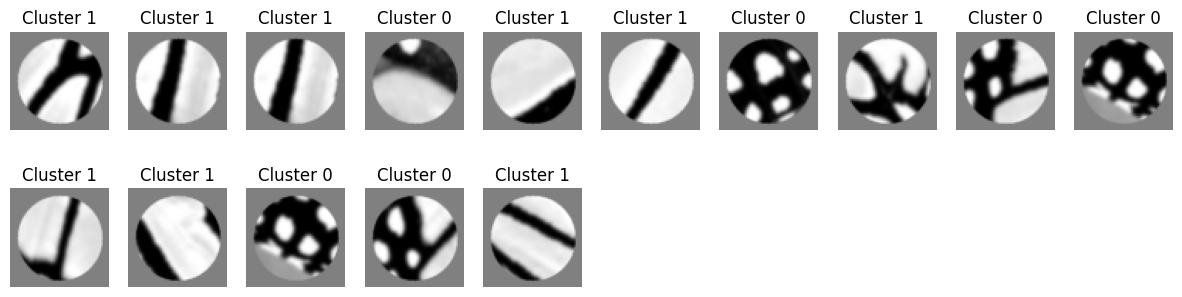

In [73]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os
from PIL import Image
from typing import List, Any as Tensor
from google.colab import drive
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Define the VQVAE class with its dependencies
class ResidualLayer(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super(ResidualLayer, self).__init__()
        self.resblock = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, bias=False)
        )

    def forward(self, input: Tensor) -> Tensor:
        return input + self.resblock(input)

class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings: int, embedding_dim: int, beta: float = 0.25):
        super(VectorQuantizer, self).__init__()
        self.K = num_embeddings
        self.D = embedding_dim
        self.beta = beta
        self.embedding = nn.Embedding(self.K, self.D)
        self.embedding.weight.data.uniform_(-1 / self.K, 1 / self.K)

    def forward(self, latents: Tensor) -> Tensor:
        latents = latents.permute(0, 2, 3, 1).contiguous()
        latents_shape = latents.shape
        flat_latents = latents.view(-1, self.D)
        dist = torch.sum(flat_latents ** 2, dim=1, keepdim=True) + \
               torch.sum(self.embedding.weight ** 2, dim=1) - \
               2 * torch.matmul(flat_latents, self.embedding.weight.t())
        encoding_inds = torch.argmin(dist, dim=1).unsqueeze(1)
        device = latents.device
        encoding_one_hot = torch.zeros(encoding_inds.size(0), self.K, device=device)
        encoding_one_hot.scatter_(1, encoding_inds, 1)
        quantized_latents = torch.matmul(encoding_one_hot, self.embedding.weight)
        quantized_latents = quantized_latents.view(latents_shape)
        commitment_loss = F.mse_loss(quantized_latents.detach(), latents)
        embedding_loss = F.mse_loss(quantized_latents, latents.detach())
        vq_loss = commitment_loss * self.beta + embedding_loss
        quantized_latents = latents + (quantized_latents - latents).detach()
        return quantized_latents.permute(0, 3, 1, 2).contiguous(), vq_loss

class VQVAE(nn.Module):
    def __init__(self, in_channels: int, embedding_dim: int, num_embeddings: int, hidden_dims: List = None, beta: float = 0.25, img_size: int = 64):
        super(VQVAE, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.img_size = img_size
        self.beta = beta

        modules = []
        if hidden_dims is None:
            hidden_dims = [128, 256]

        for h_dim in hidden_dims:
            modules.append(nn.Sequential(nn.Conv2d(in_channels, h_dim, kernel_size=4, stride=2, padding=1), nn.LeakyReLU()))
            in_channels = h_dim

        modules.append(nn.Sequential(nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1), nn.LeakyReLU()))

        for _ in range(6):
            modules.append(ResidualLayer(in_channels, in_channels))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Sequential(nn.Conv2d(in_channels, embedding_dim, kernel_size=1, stride=1), nn.LeakyReLU()))

        self.encoder = nn.Sequential(*modules)
        self.vq_layer = VectorQuantizer(num_embeddings, embedding_dim, beta)
        modules = []

        modules.append(nn.Sequential(nn.Conv2d(embedding_dim, hidden_dims[-1], kernel_size=3, stride=1, padding=1), nn.LeakyReLU()))

        for _ in range(6):
            modules.append(ResidualLayer(hidden_dims[-1], hidden_dims[-1]))

        modules.append(nn.LeakyReLU())
        hidden_dims.reverse()

        for i in range(len(hidden_dims) - 1):
            modules.append(nn.Sequential(nn.ConvTranspose2d(hidden_dims[i], hidden_dims[i + 1], kernel_size=4, stride=2, padding=1), nn.LeakyReLU()))

        modules.append(nn.Sequential(nn.ConvTranspose2d(hidden_dims[-1], out_channels=3, kernel_size=4, stride=2, padding=1), nn.Tanh()))
        self.decoder = nn.Sequential(*modules)

    def encode(self, input: Tensor) -> List[Tensor]:
        result = self.encoder(input)
        return [result]

    def decode(self, z: Tensor) -> Tensor:
        result = self.decoder(z)
        return result

    def forward(self, input: Tensor, **kwargs) -> List[Tensor]:
        encoding = self.encode(input)[0]
        quantized_inputs, vq_loss = self.vq_layer(encoding)
        return [self.decode(quantized_inputs), input, vq_loss]

    def loss_function(self, *args, **kwargs) -> dict:
        recons = args[0]
        input = args[1]
        vq_loss = args[2]
        recons_loss = F.mse_loss(recons, input)
        loss = recons_loss + vq_loss
        return {'loss': loss, 'Reconstruction_Loss': recons_loss, 'VQ_Loss': vq_loss}

from PIL import Image
import os
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define helper functions and classes (such as calculate_entropy and ImageDataset)
def calculate_entropy(image):
    grayscale_image = image.convert('L')
    histogram = grayscale_image.histogram()
    histogram_length = sum(histogram)
    samples_probability = [float(h) / histogram_length for h in histogram]
    return -sum(p * np.log2(p) for p in samples_probability if p != 0)

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None, entropy_threshold=4):
        self.folder_path = folder_path
        self.transform = transform
        self.images = []
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                image = Image.open(img_path).convert('RGB')
                entropy = calculate_entropy(image)
                print(entropy)
                if entropy >= entropy_threshold:
                    self.images.append((image, img_path))
                else:
                    os.remove(img_path)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image, _ = self.images[index]
        if self.transform:
            image = self.transform(image)
        return image

# Image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset and create DataLoader
dataset_path = '/content/Organized_Images/133'
dataset = ImageDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)

# Initialize the VQVAE model
model = VQVAE(in_channels=3, embedding_dim=64, num_embeddings=512, hidden_dims=[128, 256], beta=0.25)
model.eval()  # Set the model to evaluation mode if it's pre-trained

# Extract latent vectors and VQ loss
latent_vectors = []
vq_losses = []
with torch.no_grad():
    for images in dataloader:
        _, _, vq_loss = model(images)
        latent_vectors.append(model.encode(images)[0])
        vq_losses.append(vq_loss.item())

latent_vectors = torch.cat(latent_vectors)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(latent_vectors.view(latent_vectors.size(0), -1).cpu().numpy())

# Plot images with cluster labels
def plot_images_with_clusters():
    plt.figure(figsize=(15, 20))
    for i, (images, label) in enumerate(zip(dataloader.dataset, cluster_labels)):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
        plt.title(f'Cluster {label}')
        plt.axis('off')
        if i == 99:  # Limit to 100 images
            break
    plt.show()

plot_images_with_clusters()


4.233716316136854
4.162482015427216
3.9484168684909884
4.308555387210145
4.427712646856758
4.310801321984949
4.172638735979523
4.308555387210145
4.415209955284344
4.113865954635664
3.5729979653264836
4.456808338013931
4.162490018958523
4.308555387210145
4.891114104519689
4.192097555535409
4.375488366858847
4.550502174403735
3.61973259734393


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


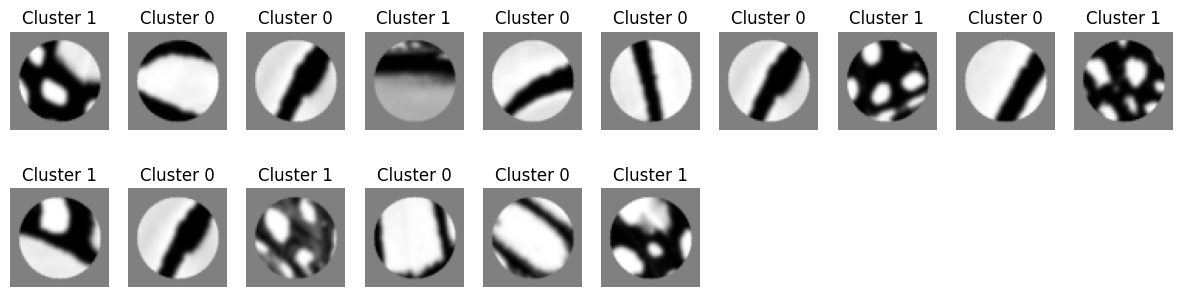

In [74]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os
from PIL import Image
from typing import List, Any as Tensor
from google.colab import drive
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Define the VQVAE class with its dependencies
class ResidualLayer(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        super(ResidualLayer, self).__init__()
        self.resblock = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.ReLU(True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, bias=False)
        )

    def forward(self, input: Tensor) -> Tensor:
        return input + self.resblock(input)

class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings: int, embedding_dim: int, beta: float = 0.25):
        super(VectorQuantizer, self).__init__()
        self.K = num_embeddings
        self.D = embedding_dim
        self.beta = beta
        self.embedding = nn.Embedding(self.K, self.D)
        self.embedding.weight.data.uniform_(-1 / self.K, 1 / self.K)

    def forward(self, latents: Tensor) -> Tensor:
        latents = latents.permute(0, 2, 3, 1).contiguous()
        latents_shape = latents.shape
        flat_latents = latents.view(-1, self.D)
        dist = torch.sum(flat_latents ** 2, dim=1, keepdim=True) + \
               torch.sum(self.embedding.weight ** 2, dim=1) - \
               2 * torch.matmul(flat_latents, self.embedding.weight.t())
        encoding_inds = torch.argmin(dist, dim=1).unsqueeze(1)
        device = latents.device
        encoding_one_hot = torch.zeros(encoding_inds.size(0), self.K, device=device)
        encoding_one_hot.scatter_(1, encoding_inds, 1)
        quantized_latents = torch.matmul(encoding_one_hot, self.embedding.weight)
        quantized_latents = quantized_latents.view(latents_shape)
        commitment_loss = F.mse_loss(quantized_latents.detach(), latents)
        embedding_loss = F.mse_loss(quantized_latents, latents.detach())
        vq_loss = commitment_loss * self.beta + embedding_loss
        quantized_latents = latents + (quantized_latents - latents).detach()
        return quantized_latents.permute(0, 3, 1, 2).contiguous(), vq_loss

class VQVAE(nn.Module):
    def __init__(self, in_channels: int, embedding_dim: int, num_embeddings: int, hidden_dims: List = None, beta: float = 0.25, img_size: int = 64):
        super(VQVAE, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.img_size = img_size
        self.beta = beta

        modules = []
        if hidden_dims is None:
            hidden_dims = [128, 256]

        for h_dim in hidden_dims:
            modules.append(nn.Sequential(nn.Conv2d(in_channels, h_dim, kernel_size=4, stride=2, padding=1), nn.LeakyReLU()))
            in_channels = h_dim

        modules.append(nn.Sequential(nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=1, padding=1), nn.LeakyReLU()))

        for _ in range(6):
            modules.append(ResidualLayer(in_channels, in_channels))
        modules.append(nn.LeakyReLU())
        modules.append(nn.Sequential(nn.Conv2d(in_channels, embedding_dim, kernel_size=1, stride=1), nn.LeakyReLU()))

        self.encoder = nn.Sequential(*modules)
        self.vq_layer = VectorQuantizer(num_embeddings, embedding_dim, beta)
        modules = []

        modules.append(nn.Sequential(nn.Conv2d(embedding_dim, hidden_dims[-1], kernel_size=3, stride=1, padding=1), nn.LeakyReLU()))

        for _ in range(6):
            modules.append(ResidualLayer(hidden_dims[-1], hidden_dims[-1]))

        modules.append(nn.LeakyReLU())
        hidden_dims.reverse()

        for i in range(len(hidden_dims) - 1):
            modules.append(nn.Sequential(nn.ConvTranspose2d(hidden_dims[i], hidden_dims[i + 1], kernel_size=4, stride=2, padding=1), nn.LeakyReLU()))

        modules.append(nn.Sequential(nn.ConvTranspose2d(hidden_dims[-1], out_channels=3, kernel_size=4, stride=2, padding=1), nn.Tanh()))
        self.decoder = nn.Sequential(*modules)

    def encode(self, input: Tensor) -> List[Tensor]:
        result = self.encoder(input)
        return [result]

    def decode(self, z: Tensor) -> Tensor:
        result = self.decoder(z)
        return result

    def forward(self, input: Tensor, **kwargs) -> List[Tensor]:
        encoding = self.encode(input)[0]
        quantized_inputs, vq_loss = self.vq_layer(encoding)
        return [self.decode(quantized_inputs), input, vq_loss]

    def loss_function(self, *args, **kwargs) -> dict:
        recons = args[0]
        input = args[1]
        vq_loss = args[2]
        recons_loss = F.mse_loss(recons, input)
        loss = recons_loss + vq_loss
        return {'loss': loss, 'Reconstruction_Loss': recons_loss, 'VQ_Loss': vq_loss}

from PIL import Image
import os
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define helper functions and classes (such as calculate_entropy and ImageDataset)
def calculate_entropy(image):
    grayscale_image = image.convert('L')
    histogram = grayscale_image.histogram()
    histogram_length = sum(histogram)
    samples_probability = [float(h) / histogram_length for h in histogram]
    return -sum(p * np.log2(p) for p in samples_probability if p != 0)

class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path, transform=None, entropy_threshold=4):
        self.folder_path = folder_path
        self.transform = transform
        self.images = []
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            if os.path.isfile(img_path):
                image = Image.open(img_path).convert('RGB')
                entropy = calculate_entropy(image)
                print(entropy)
                if entropy >= entropy_threshold:
                    self.images.append((image, img_path))
                else:
                    os.remove(img_path)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image, _ = self.images[index]
        if self.transform:
            image = self.transform(image)
        return image

# Image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset and create DataLoader
dataset_path = '/content/Organized_Images/114'
dataset = ImageDataset(dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=10, shuffle=False)

# Initialize the VQVAE model
model = VQVAE(in_channels=3, embedding_dim=64, num_embeddings=512, hidden_dims=[128, 256], beta=0.25)
model.eval()  # Set the model to evaluation mode if it's pre-trained

# Extract latent vectors and VQ loss
latent_vectors = []
vq_losses = []
with torch.no_grad():
    for images in dataloader:
        _, _, vq_loss = model(images)
        latent_vectors.append(model.encode(images)[0])
        vq_losses.append(vq_loss.item())

latent_vectors = torch.cat(latent_vectors)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
cluster_labels = kmeans.fit_predict(latent_vectors.view(latent_vectors.size(0), -1).cpu().numpy())

# Plot images with cluster labels
def plot_images_with_clusters():
    plt.figure(figsize=(15, 20))
    for i, (images, label) in enumerate(zip(dataloader.dataset, cluster_labels)):
        plt.subplot(10, 10, i + 1)
        plt.imshow(images.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
        plt.title(f'Cluster {label}')
        plt.axis('off')
        if i == 99:  # Limit to 100 images
            break
    plt.show()

plot_images_with_clusters()
